# Homework 1: Probability Review and Linear Regression
by Rachel Manzelli and Natasha Frumkin

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.
4. Now, upload the dataset associated with this assignment to the Colab runtime. On the left side of the screen, click on "Files" (denoted by a **folder icon**) and then click on "Upload to session storage" (denoted by a **file icon with an up arrow**). Select the dataset (`rockstrength.csv`).

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions**: please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by the due date (see Schedule).

## Probability Review

### 1. Conditional Distributions

Sarah sells earrings in 3 different styles, `flower`, `star`, and `circle`. She sells them in set sizes of 1 or 2, depending on how many ears the customer has pierced. They are pre-packaged (e.g. she cannot separate one set of 2 earrings into two sets of 1 earring). She has different amounts of each style and set size, and wants to better understand the underlying distribution of her inventory.

Given the following joint probability distribution table for her two random variables $A$ (style; possible values `flower`, `star`, and `circle`) and $B$ (set size; possible values $1$ and $2$): 

|               |               |       |  $A$   |   |
| -- |--| -----| -----|----- |
|               |                        |  $flower$    | $star$     |  $circle$    |
| **$B$**      | $1$      |   $0.16$ |   $?$ |    $0.08$ |
|  | $2$      |    $0.37$ |    $0.06$ |    $0.21$ |


**a.** What is the value of the missing entry (marked with '$?$')?

**b.** What is $p(B = 1 | A = flower)$?

**c.** What is $p(B = 2)$?

**d.** What is $p(A = circle | B = 2)$?

**Solution**

**a.** The entire table must sum to 1, so the missing value $?$ is 0.12.

**b.** $P(B=1|A=flower) = \frac{P(B=1,A=flower)}{P(A=flower)} = \frac{P(B=1,A=flower)}{\sum_{b}^{} P(B=b,A=flower) } = \frac{0.16}{0.53} $

**c.** $P(B=2) = \sum_{a}^{} P(A=a,B=2) = 0.64 $

**d.** $P(A=circle|B=2) = \frac{P(A=circle,B=2)}{P(B=2)} = \frac{P(A=circle,B=2)}{\sum_{a}^{} P(A=a,B=2) } = \frac{0.21}{0.64} $

### 2. Expectation and Covariance

We are given $X \sim N(\mu,\sigma^2)$ and $Y \sim Poisson(\lambda)$ sampled IID from known distributions. We define: 

$$A = 2X+Y$$

$$B = X-2Y$$

**a.** What is $E[A]$ and $E[B]$?

**b.** What is $var(A)$ and $var(B)$? Helpful identity: $E[Y^2] = \lambda^2 + \lambda$

**c.** What is covariance and what is correlation? Explain in your own words.

**d.** What is the covariance of $A$ and $B$?

**e.** Define independence of two random variables. Are $A$ and $B$ independent? Explain.

**Solution**

**a.** 

$E[A] = E[2X + Y] = 2E[X] + E[Y] = 2\mu + \lambda$

$E[B] = E[X - 2Y] = E[X] - 2E[Y] = \mu - 2\lambda$

**b.** 

To solve for $var(A)$ and $var(B)$, we will need $E[X^2]$ and $E[Y^2]$:

$E[X^2] = var(X) + (E[X])^2 = \sigma^2 + \mu^2$

$E[Y^2] = \lambda^2 + \lambda$

$\mathbf{var(A)}$

$var(A) = E[A^2] - (E[A])^2$

$var(A) = E[(2X+Y)(2X+Y)] - (E[2X+Y])^2$

Simplify $E[(2X+Y)(2X+Y)]$:

$E[(2X+Y)(2X+Y)] = E[4X^2 + 4XY + Y^2] = 4E[X^2] + 4E[X]E[Y] + E[Y^2] = 4(\sigma^2 + \mu^2) + 4\mu\lambda + \lambda^2 + \lambda$

Use $E[A]$ from the previous part to get the final answer:

$var(A) = 4(\sigma^2 + \mu^2) + 4\mu\lambda + \lambda^2 + \lambda - (2\mu + \lambda)^2$

$var(A) = 4\sigma^2 + \lambda$ (simplify)

$\mathbf{var(B)}$

$var(B) = E[B^2] - (E[B])^2$

$var(B) = E[(X-2Y)(X-2Y)] - (E[X-2Y])^2$

Simplify $E[(X-2Y)(X-2Y)]$:

$E[(X-2Y)(X-2Y)] = E[X^2 - 4YX + 4Y^2] = E[X^2] - 4E[Y]E[X] + 4E[Y^2] = \sigma^2 + \mu^2 - 4\lambda\mu + 4(\lambda^2 + \lambda)$

Use $E[B]$ from the previous part to get the final answer:

$var(B) = \sigma^2 + \mu^2 - 4\lambda\mu + 4(\lambda^2 + \lambda) - (\mu - 2\lambda)^2$

$var(B) = \sigma^2 + 4\lambda$ (simplify)

**c.** 

*Covariance*, $E[(X-\mu_x)(Y-\mu_y)]$, is a measure of how the combined average of $X$ and $Y$ differs from the piecewise average. This measures the combined variance of $X$ and $Y$. 

*Correlation* is a measure of how two random variables' distributions are related. A positive correlation indicates that the larger values of $X$ correspond to the larger values of $Y$, while a negative correlation indicates that the larger values of $X$ correspond to the smaller values of $Y$.

**d.** 

$cov(A, B) = E[AB] - E[A]E[B]$

Simplify $E[AB]$:

$E[AB] = E[(2X+Y)(X-2Y)] = E[2X^2 - 3YX - 2Y^2] = 2E[X^2] - 3E[Y]E[X] - 2E[Y^2]$ ($X, Y$ independent) $= 2(\sigma^2 + \mu^2) - 3\lambda\mu - 2(\lambda^2 + \lambda)$

Use $E[A]$ and $E[B]$ from part **a** to get the final answer: 

$cov(A, B) = 2(\sigma^2 + \mu^2) - 3\lambda\mu - 2(\lambda^2 + \lambda) - (2\mu + \lambda)(\mu - 2\lambda)$

$cov(A, B) = 2\sigma^2 - 2\lambda$ (simplify)

**e.** Given random variables $X$ and $Y$, they are independent $iff$ $P(X, Y) = P(X)P(Y), cov(X, Y) = 0$. $cov(A, B)$ is nonzero, so $A$ and $B$ are not independent.

### 3. Closed-Form Maximum Likelihood

Assume that we are given $n$ IID samples $(x_1,...,x_n)$ from each $P(X | \theta)$ given below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of the given distributions. **Show your work, and explain your steps.**

**a.** $P(X | \theta) = Exp(\theta) = \theta e^{-\theta x}, x \geq 0$

**b.** $P(X | \theta) = Uniform(0, \theta) = \frac{1}{\theta}, 0 < x < \theta$ (*Hint*: drawing the distribution may help you.)

**c.** $P(X | \theta) = \frac{2x}{\theta^2} e ^{\frac{-x^2}{\theta^2}}, x \geq 0$

**d.** Suppose the prior $P(\theta)$ is $Uniform(a, b)$. What is the MAP estimate for the distribution in part **a**?

**Solution**

**a.** 

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} P(x_1,...x_n|\theta)$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}P(x_i|\theta)$ (since $x_i$ are IID)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}\theta e^{-\theta x_i}, x_i \geq 0 \forall x_i \in \{x_1, .., x_n\}$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}\theta * \prod_{i=1}^{n}e^{-\theta x_i}$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \theta^n * e^{-\theta \sum_{i=1}^{n}x_i}$ (since $e^{a}e^{b} = e^{a+b}$). This is the likelihood function.

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} log(\theta^n * e^{-\theta \sum_{i=1}^{n}x_i})$ (take the $log$ to obtain the log-likelihood function)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} nlog(\theta) - \theta \sum_{i=1}^{n}x_i$ (simplify using $log$ properties). This is the log-likelihood function.

$\frac{d}{d\theta}[nlog(\theta) - \theta \sum_{i=1}^{n}x_i] = 0$ (take the derivative w.r.t $\theta$ and set to 0)

$\frac{n}{\theta} - \sum_{i=1}^{n}x_i = 0$ (simplify)

$\hat{\theta}_{ML} = \frac{n}{\sum_{i=1}^{n}x_i}$ (isolate $\theta$)

**b.**

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} P(x_1,...x_n|\theta)$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}P(x_i|\theta)$ (since $x_i$ are IID)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}\frac{1}{\theta}, 0 < x_i < \theta \forall x_i \in \{x_1, .., x_n\}$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \frac{1}{\theta^n}, 0 < x_1, ..., x_n < \theta $ This is the likelihood function.

This function is monotonically decreasing. In order to maximize it, we need to choose the minimum possible value of $\theta$.

We know from our bounds that $\theta \geq max(x_1, ..., x_n)$, since $\theta$ defines the rightmost limit of the distribution. Thus, the smallest possible value of $\theta$ is $max(x_1, ..., x_n)$. (Visualizing the $Uniform(0,\theta)$ distribution may help make sense of this.)

$\hat{\theta}_{ML} = max(x_1, ..., x_n)$

**c.**

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} P(x_1,...x_n|\theta)$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}P(x_i|\theta)$ (since $x_i$ are IID)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n} \frac{2x_i}{\theta^2} e ^{\frac{-x_i^2}{\theta^2}}, x_i \geq 0 \forall x_i \in \{x_1, .., x_n\}$ This is the likelihood function.

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} log(\prod_{i=1}^{n} \frac{2x_i}{\theta^2} e ^{\frac{-x_i^2}{\theta^2}})$ (take the $log$ to obtain the log-likelihood function)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \sum_{i=1}^{n} (log(2x_i) - log(\theta^2) + log(e ^{\frac{-x_i^2}{\theta^2}}))$ ($log$ product rule)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \sum_{i=1}^{n} (log(2x_i) - log(\theta^2) - {\frac{x_i^2}{\theta^2}}))$ ($log e^x = x$)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \sum_{i=1}^{n} (-log(\theta^2) - {\frac{x_i^2}{\theta^2}}))$ (drop terms not dependent on $\theta$)

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} -2nlog\theta - \frac{1}{\theta^2}\sum_{i=1}^{n}x_i^2$ (simplify summation) This is the log-likelihood function.

$\frac{d}{d\theta}[-2nlog\theta - \frac{1}{\theta^2}\sum_{i=1}^{n}x_i^2] = 0$ (take the derivative w.r.t $\theta$ and set to 0)

$\frac{-2n}{\theta} - (\sum_{i=1}^{n}x_i^2)(\frac{-2}{\theta^3}) = 0$

$2n = \sum_{i=1}^{n}x_i^2(\frac{2}{\theta^2})$ (simplify)

$\theta^2 = \frac{1}{n}\sum_{i=1}^{n}x_i^2$ (isolate $\theta$)

$\hat{\theta}_{ML} = \sqrt{\frac{\sum_{i=1}^{n}x_i^2}{n}}$

**d.**

From $MLE$:

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} P(x_1,...x_n|\theta)$

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \frac{P(\theta|X)P(X)}{P(\theta)} \propto \frac{P(\theta|X)}{P(\theta)}$ (removing terms that don't depend on $\theta$)

Since $P(\theta)$ is constant over all $\theta$  (the prior is a $Uniform$ distribution) we can remove it, since it doesn't affect the maximization:

$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} P(\theta|X) = MAP(\theta) = \frac{n}{\sum_{i=1}^{n}x_i} $

From $MAP$:

$MAP(\theta) = \underset{\theta}{\operatorname{argmax}} P(\theta|X)$

$MAP(\theta) = \underset{\theta}{\operatorname{argmax}} \frac{P(X|\theta)P(\theta)}{P(X)} \propto P(X|\theta)P(\theta) $ (removing terms that don't depend on $\theta$)

Since $P(\theta)$ is constant over all $\theta$  (the prior is a $Uniform$ distribution) we can remove it, since it doesn't affect the maximization:

$MAP(\theta) = \underset{\theta}{\operatorname{argmax}} P(X|\theta) = MLE(\theta) = \frac{n}{\sum_{i=1}^{n}x_i}$

## ML Basics with Python
The following section will walk you through performing basic ML operations with Python, including loading, splitting, and observing a dataset using `pandas`, `sklearn`, and `matplotlib`, as well as running linear regression over features of a dataset using `sklearn`'s built-in methods.

### 4. Data Visualization with `pandas` and `matplotlib`

In the following set of problems, we'll look at how we can use different features of rock specimens to model Uniaxial Compressive Strength (UCS), the maximum axial compressive stress that a right-cylindrical sample of material can withstand before failing.

Features of this dataset:
- % Quartz (`quartz`)
- % Plagaoclase (`plag`)
- % K.feldspar (`kfds`)
- % Hornblende (`hb`)
- Grain size (mm) (`gs`)
- Grain area (mm^2) (`ga`)
- Shape Factor (`sf`)
- Aspect Ratio (`ar`)
- Uniaxial Compressive Strength (`UCS`)

#### Load the dataset and look at the features
First, we'll use `pandas` to load the dataset and look at some samples of rock specimens and their properties.

In [1]:
import pandas as pd
rock_strength = pd.read_csv("rockstrength.csv")
rock_strength.head()

,sample_id,UCS,quartz,plag,kfds,hb,gs,ga,sf,ar
0,1,100.6,40.3,9.98,17.01,21.57,0.031,754.4,0.594,0.630
1,2,112.0,47.1,8.50,15.00,23.00,0.025,490.6,0.612,0.612
2,3,117.5,45.4,9.10,16.20,24.00,0.022,379.9,0.628,0.628
3,4,100.9,41.3,7.72,11.02,18.86,0.044,1519.8,0.571,0.667
4,5,94.5,33.8,4.10,14.00,16.00,0.043,1451.5,0.575,0.662


#### 4.a. Visualize the features against the variable we'd like to be able to model (`UCS`)
We're going to model `UCS` using a linear regression model. To do that, we'd like to visualize the data and choose features that are well-suited for a linear model. Use `matplotlib` to plot each feature in the `rock_features` list below against the target, `UCS`.

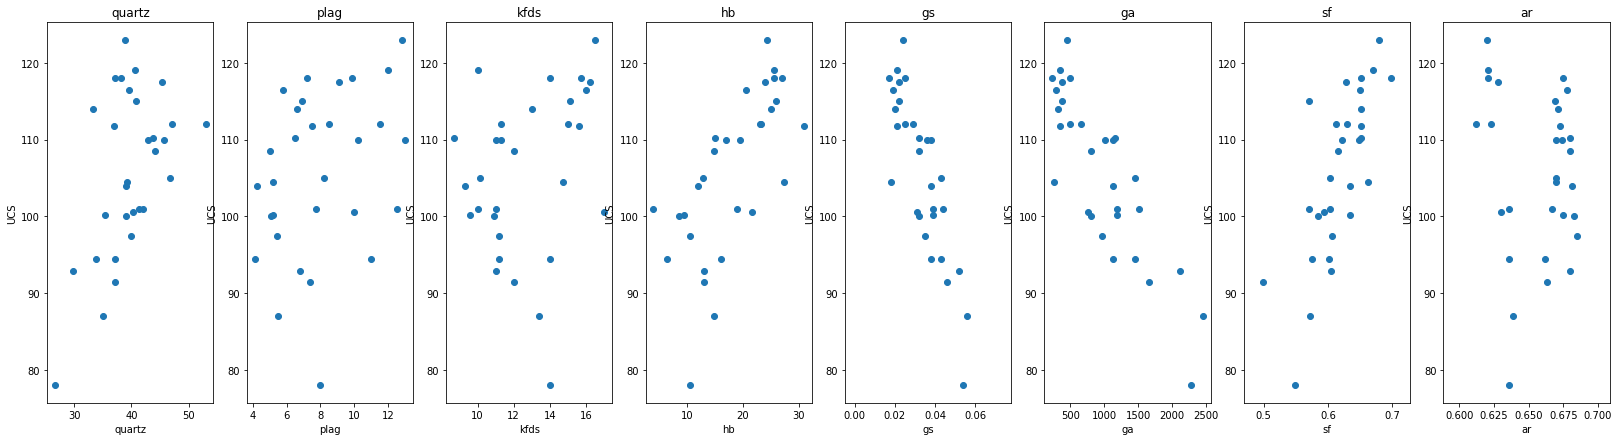

In [2]:
import matplotlib.pyplot as plt
rock_features = ['quartz', 'plag', 'kfds', 'hb', 'gs', 'ga', 'sf', 'ar']
target = rock_strength['UCS']

# Create a figure to hold our plots
plt.figure(figsize=(28, 7))
for i, feature in enumerate(rock_features):
    # Create subplots for each feature within this figure
    plt.subplot(1, len(rock_features) , i+1)
    ### ADD CODE HERE:
    ### Set `x` (The feature we want to plot)
    ### and `y` (The value that we want to estimate)
    x = rock_strength[feature]
    y = target
    ###
    plt.scatter(x, y, marker='o')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('UCS')

#### 4.b. Select the best feature for a linear regression model
Which feature looks like it would work well for fitting a linear regression model? Pick just one, and assign it to the variable called `rock_strength_features`. *There is more than one correct answer.*

In [3]:
### ADD CODE HERE: 
### Set `rock_strength_features` (A feature to use to fit our linear regression model)
rock_strength_features = rock_strength['ga']
###
rock_strength_labels = rock_strength['UCS']

***Briefly explain your rationale for choosing this feature in the cell below.***

I chose *Grain area* (`'ga'`) as the feature to use throughout this set of problems, since this feature looks linear (as though a line could be drawn through it). Linear data is the best fit for linear models!

### 5. Train-Test Splits with `sklearn`

Train-test splitting is a fundamental practice in machine learning. When fitting a model, we'd to divide our data into separate training and testing sets in order to fairly evaluate how our model performs. We will use `sklearn`'s built-in module called `train_test_split` to split our data.

#### 5.a. Understanding train-test splits
First, use `train_test_split` to split the following random array of samples into training and testing sets. *Refer to the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to better understand how this method is used.* Observe the sizes of the resulting datasets, and which samples were placed where.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Creating a random array of 20 samples with 2 features each (X), and 20 corresponding labels (y)
X, y = np.arange(40).reshape((20, 2)), [*range(20)]

print("X:")
print(X)
print("Shape of X:")
print(X.shape)

print("y:")
print(y)
print("Shape of y:")
print(len(y))

X:
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]
 [36 37]
 [38 39]]
Shape of X:
(20, 2)
y:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Shape of y:
20


In [5]:
### ADD CODE HERE:
### Use train_test_split to split the data into training and testing sets.
### (Note: 20% of the total data amount is a typical size for the test set.)
### Print out the resulting data splits and their sizes, following how they were printed above.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
print(X_train)
print("Shape of X_train:")
print(X_train.shape)

print("y_train:")
print(y_train)
print("Shape of y_train:")
print(len(y_train))

print("X_test:")
print(X_test)
print("Shape of X_test:")
print(X_test.shape)

print("y_test:")
print(y_test)
print("Shape of y_test:")
print(len(y_test))

X_train:
[[16 17]
 [10 11]
 [22 23]
 [ 6  7]
 [36 37]
 [32 33]
 [26 27]
 [ 4  5]
 [18 19]
 [38 39]
 [ 8  9]
 [24 25]
 [14 15]
 [20 21]
 [28 29]
 [12 13]]
Shape of X_train:
(16, 2)
y_train:
[8, 5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]
Shape of y_train:
16
X_test:
[[ 0  1]
 [34 35]
 [30 31]
 [ 2  3]]
Shape of X_test:
(4, 2)
y_test:
[0, 17, 15, 1]
Shape of y_test:
4


#### 5.b. Splitting our rock data into training and testing sets

Use the same process to split our rock features and corresponding targets. Again, observe the sizes and samples of the resulting training and testing sets. (Note that our dataset only has one feature.)

In [6]:
# Convert our pandas dataframes to numpy arrays
rock_strength_features = np.asarray(rock_strength_features).reshape(-1,1)
rock_strength_labels = np.asarray(rock_strength_labels).reshape(-1,1)

### ADD CODE HERE:
### Use train_test_split to split the data into training and testing sets. 
### (Note: 20% of the total data amount is a typical size for the test set.)
### Print out the resulting data splits and their sizes, following how they were printed above.
X_train, X_test, y_train, y_test = train_test_split(rock_strength_features, rock_strength_labels, test_size=0.2, random_state=42)

print("X_train:")
print(X_train)
print("Shape of X_train:")
print(X_train.shape)

print("y_train:")
print(y_train)
print("Shape of y_train:")
print(len(y_train))

print("X_test:")
print(X_test)
print("Shape of X_test:")
print(X_test.shape)

print("y_test:")
print(y_test)
print("Shape of y_test:")
print(len(y_test))

X_train:
[[ 660.2]
 [1194. ]
 [ 346.2]
 [ 754.4]
 [1451.5]
 [ 283.4]
 [1661.1]
 [ 314. ]
 [2122.6]
 [1133.5]
 [ 490.6]
 [ 379.9]
 [1133.5]
 [1519.8]
 [1451.5]
 [ 490.6]
 [1133.5]
 [ 452.2]
 [1193.9]
 [ 803.8]
 [2289.1]
 [ 254.3]
 [1163.8]
 [ 961.6]]
Shape of X_train:
(24, 1)
y_train:
[[112. ]
 [101. ]
 [111.7]
 [100.6]
 [ 94.5]
 [116.5]
 [ 91.5]
 [114. ]
 [ 92.9]
 [110. ]
 [112. ]
 [117.5]
 [ 94.4]
 [100.9]
 [105. ]
 [118. ]
 [103.9]
 [123. ]
 [100.2]
 [100. ]
 [ 78. ]
 [104.5]
 [110.2]
 [ 97.5]]
Shape of y_train:
24
X_test:
[[ 346.2]
 [ 226.9]
 [1017.3]
 [ 379.9]
 [ 803.8]
 [2462. ]]
Shape of X_test:
(6, 1)
y_test:
[[119. ]
 [118. ]
 [110. ]
 [115. ]
 [108.5]
 [ 87. ]]
Shape of y_test:
6


### 6. Linear Regression
Now, we'll fit a linear regression model to our data using `sklearn`'s built-in linear regression method. We will also test the model with our test data, and see how it performs.

#### 6.a. Fit the linear regression model with our rock data
Use `sklearn`'s built-in linear regression method to fit a model using the training data you got as a result of problem 6. *Refer to the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to better understand how this method is used.*

In [7]:
from sklearn.linear_model import LinearRegression

### ADD CODE HERE:
### Use the LinearRegression() method to fit a model using the training data.
reg = LinearRegression().fit(X_train, y_train)
###

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_base.py:569: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


#### 6.b. Plot the data against the model
Use `matplotlib` to visualize the fit of the model alongside the rock feature data. You will need to extract the parameters of the model, the coefficient $w$ and the intercept $b$, to do this.

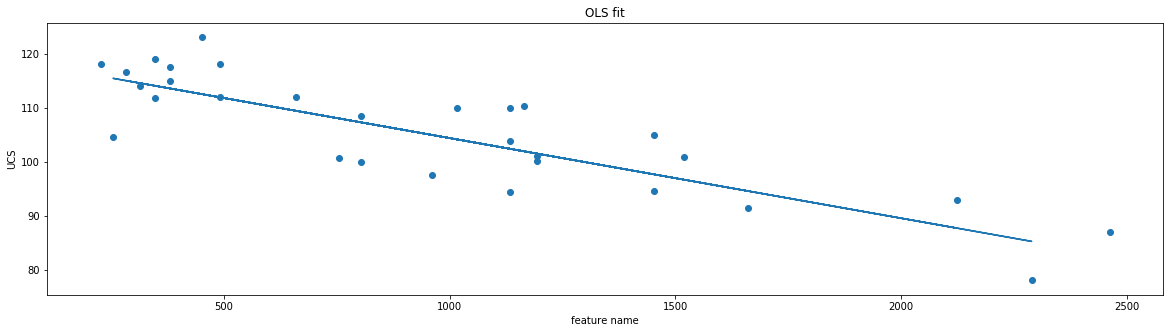

In [8]:
### ADD CODE HERE:
### Extract the coefficient of the model, w
### Extract the intercept of the model, b
w = reg.coef_[0]
b = reg.intercept_
###

# Create plot figure
plt.figure(figsize=(20, 5))
### ADD CODE HERE:
### Use plt.plot() to plot the model curve
### Use plt.scatter() to plot the original feature data
plt.plot(X_train, X_train * w + b)                        # plot the model
plt.scatter(rock_strength_features, rock_strength_labels) # plot the features
###
plt.title("OLS fit")
plt.xlabel("feature name")
plt.ylabel("UCS")
plt.show()

#### 6.c. Plot the true UCS values against our estimated values
Let's see how well our model performs! Plot the model's estimates of UCS on our test data from problem 5 alongside the real values. Include the model fit as well for clarity.

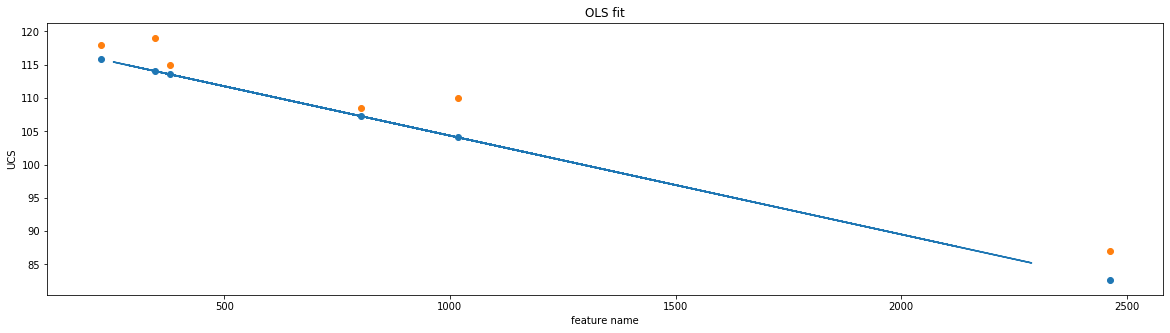

In [9]:
plt.figure(figsize=(20, 5))
### ADD CODE HERE:
### Use plt.plot() to plot the model curve
### Use plt.scatter() to plot the test data and corresponding values estimated by our model
### Use plt.scatter() to plot the test data and corresponding target values
plt.plot(X_train, X_train * w + b)       # plot the model
plt.scatter(X_test, reg.predict(X_test)) # plot predictions
plt.scatter(X_test, y_test)              # plot true values
###
plt.title("OLS fit")
plt.xlabel("feature name")
plt.ylabel("UCS")
plt.show()

**Data reference:**

E. Ali, W. Guang, A. Ibrahim (2014). "Empirical Relations Between Compressive Strength and Microfabric Properties of Amphibolites Using Multivariate Regression, Fuzzy Inference, and Neural Networks: A Comparative Study," Engineering Geology, Vol. 183, pp. 230-240.